In [238]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [239]:
w = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/seattle-weather.csv')

In [240]:
w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [241]:
w = w.drop(labels = {'date'}, axis = 1)

In [242]:
w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  1461 non-null   float64
 1   temp_max       1461 non-null   float64
 2   temp_min       1461 non-null   float64
 3   wind           1461 non-null   float64
 4   weather        1461 non-null   object 
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


<Axes: xlabel='weather', ylabel='count'>

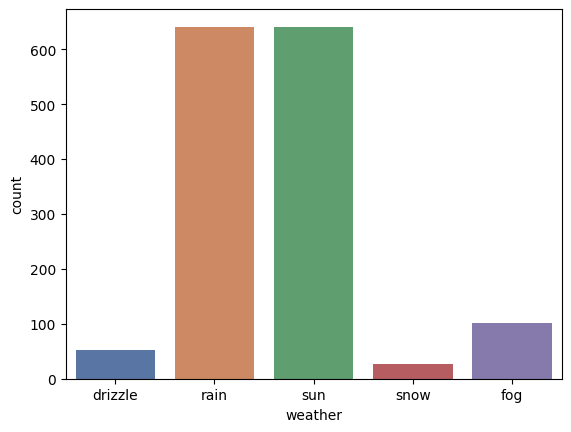

In [243]:
sns.countplot(x = 'weather', data = w, palette = 'deep')

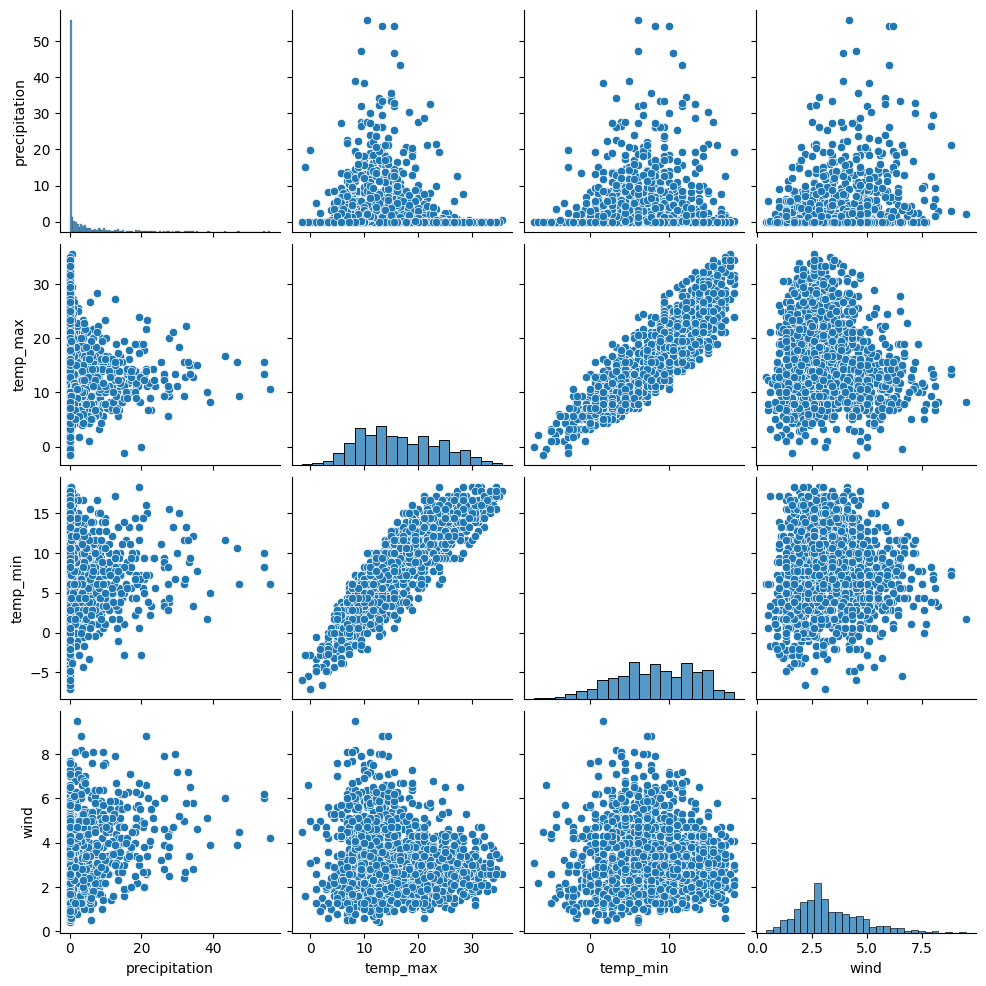

In [244]:
sns.pairplot(w)

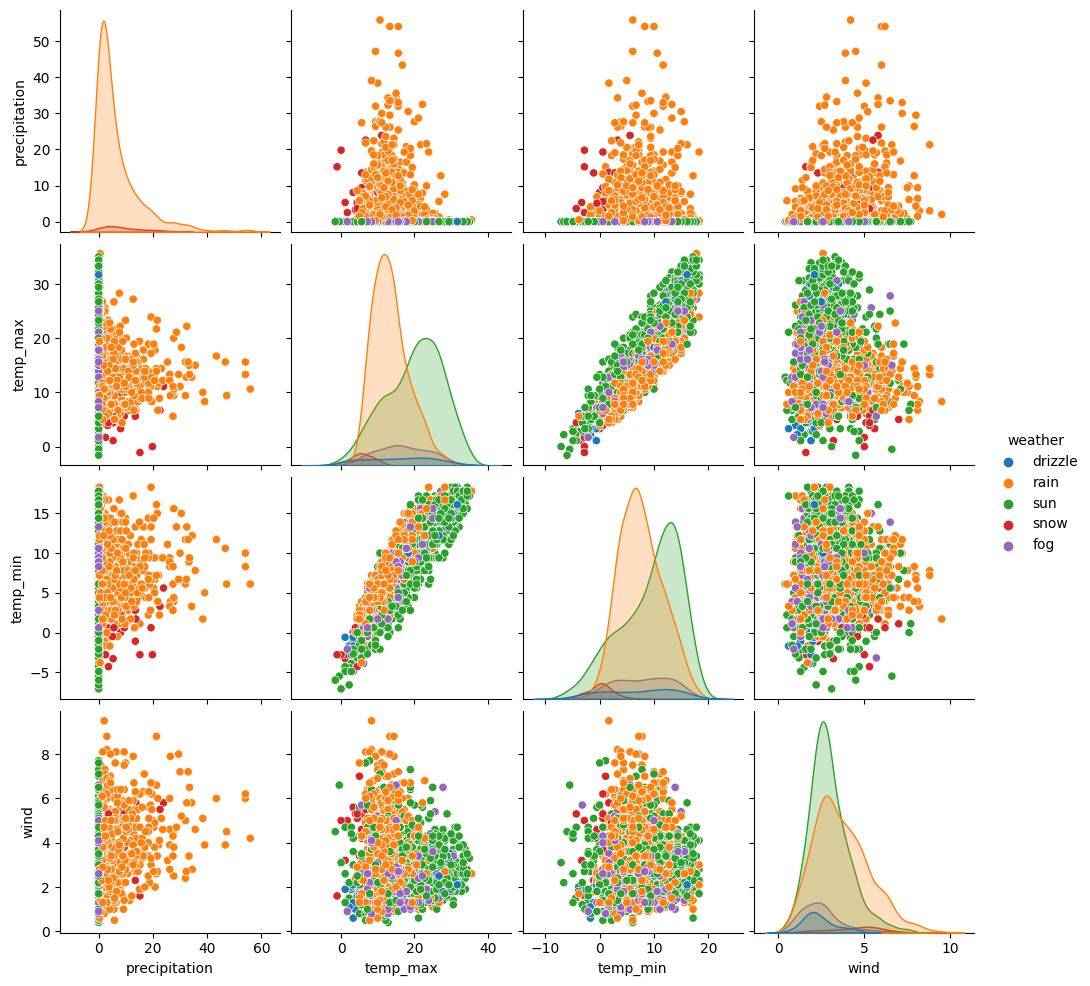

In [245]:
sns.pairplot(w, hue = 'weather')

In [246]:
w.columns

Index(['precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

In [247]:
selected_features = {'precipitation', 'temp_max', 'temp_min', 'wind'}

In [248]:
w['weather'] = w['weather'].replace({'drizzle': 1, 'rain' : 2, 'sun' : 3, 'snow' : 4, 'fog' : 5 })

In [249]:
X = w[selected_features]
y = w['weather']

<ipython-input-249-eff318331c52>:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X = w[selected_features]


In [250]:
w.head(5)

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,1
1,10.9,10.6,2.8,4.5,2
2,0.8,11.7,7.2,2.3,2
3,20.3,12.2,5.6,4.7,2
4,1.3,8.9,2.8,6.1,2


In [251]:
Scaler = StandardScaler()
X_scaled = Scaler.fit_transform(X)

In [252]:
y

0       1
1       2
2       2
3       2
4       2
       ..
1456    2
1457    2
1458    5
1459    3
1460    3
Name: weather, Length: 1461, dtype: int64

In [253]:
y_norm = pd.get_dummies(y)

In [254]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_norm, test_size = 0.2)

In [255]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1168, 4)
(293, 4)
(1168, 5)
(293, 5)


In [256]:
from sklearn.neighbors import KNeighborsClassifier
model1 = KNeighborsClassifier()
model1.fit(X_train,y_train)
print("Training_Score:",model1.score(X_train, y_train)*100)
print("Testing_score :",model1.score(X_test, y_test)*100)

Training_Score: 76.36986301369863
Testing_score : 70.64846416382252


In [257]:
#from sklearn.naive_bayes import GaussianNB
#model2 = GaussianNB()
#model2.fit(X_train,y_train)
#model2.score(X_test,y_test)

In [258]:
#from sklearn.linear_model import LogisticRegression
#model3 = LogisticRegression()
#model3.fit(X_train,y_train)
#model3.score(X_test,y_test)

In [259]:
from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier()
model4.fit(X_train,y_train)
print("Training_Score:",model4.score(X_train, y_train)*100)
print("Testing_score :",model4.score(X_test, y_test)*100)

Training_Score: 99.7431506849315
Testing_score : 79.86348122866895


In [260]:
from sklearn.tree import DecisionTreeClassifier
model5 = DecisionTreeClassifier()
model5.fit(X_train, y_train)
print("Training_Score:",model5.score(X_train, y_train)*100)
print("Testing_score :",model5.score(X_test, y_test)*100)

Training_Score: 99.65753424657534
Testing_score : 77.81569965870307


In [261]:
#ANN = tf.keras.models.Sequential()
#ANN.add(tf.keras.layers.Dense(units = 100, activation = 'relu', input_shape = (4, )))
#ANN.add(tf.keras.layers.Dense(units = 100, activation = 'relu'))
#ANN.add(tf.keras.layers.Dense(units = 100, activation = 'relu'))
#ANN.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [262]:
#ANN.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = 'accuracy')

In [263]:
#epochs_hist = ANN.fit(X_train, y_train, epochs=50, batch_size=125)

In [264]:
y_predict = model1.predict(X_test)

In [265]:
y_predict

array([[0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       ...,
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

<Axes: >

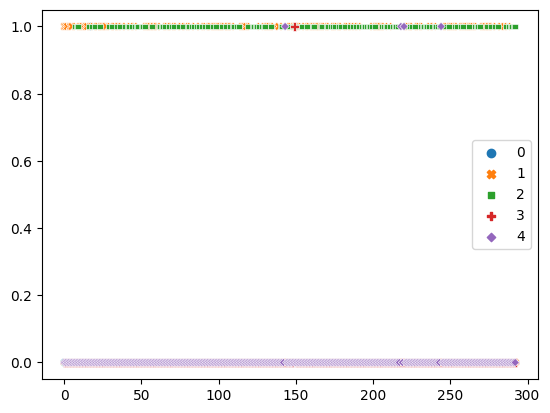

In [266]:
sns.scatterplot(y_predict)

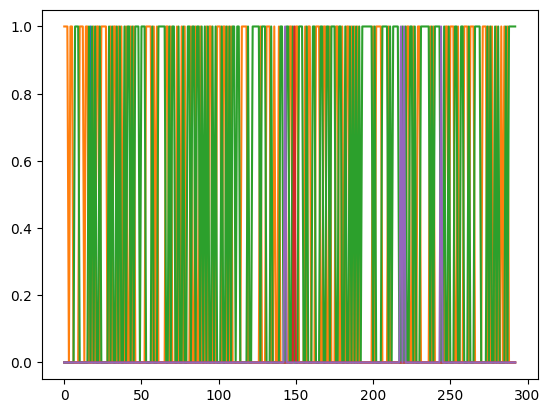

In [267]:
plt.plot(y_predict)